<a href="https://colab.research.google.com/github/nanthus/ShapeAI_Python_Machine_Learning/blob/main/Stroke_prediction(ML_project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#               **Context**
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient. ***italicised text***

In [23]:
import pandas as pd
df=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [24]:
df.shape

(5110, 12)

In [25]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## **Attribute Information**
1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" *italicised text*

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [26]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [27]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

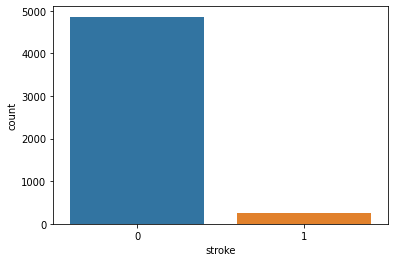

In [28]:
import seaborn as sns
sns.countplot(x='stroke',data=df)

In [29]:
df['bmi']=df['bmi'].fillna(df['bmi'].mean())

In [30]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [31]:
df.drop(['id'],axis=1,inplace=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


Label Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
cols=['gender','ever_married','work_type','Residence_type','smoking_status']
for i in cols:
  df[i]=encoder.fit_transform(df[i])

In [33]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [34]:
X=df.iloc[:,:-1]
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [35]:
y=df.iloc[:,-1]
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

Oversampling

In [36]:
#Handling dataset using Oversampling
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
Xo,yo=oversample.fit_resample(X,y)

In [37]:
yo.value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


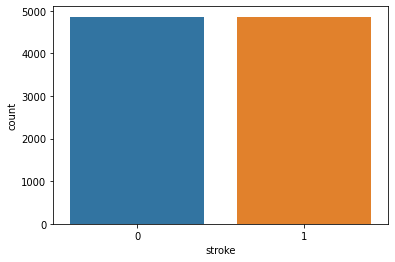

In [38]:
sns.countplot(yo,data=df)
#Countplot after Over Sampling

In [39]:
#Applying train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Xo,yo,test_size=0.3,random_state=42)

Robust Scaler

In [40]:
#scaling using RobustScaler instead of Minmax and Standard Scaler
from sklearn.preprocessing import RobustScaler
rb=RobustScaler()
rb.fit(X_train)
X_train_new=rb.transform(X_train)
X_test_new=rb.transform(X_test)

In [41]:
X_train_new

array([[ 1.        ,  0.51141196,  0.        , ...,  0.12546745,
         0.        , -0.5       ],
       [ 1.        ,  0.09830451,  0.        , ...,  1.83756308,
        -0.13468576,  0.        ],
       [ 0.        ,  0.06016611,  0.        , ..., -0.41887686,
        -0.6744122 ,  0.5       ],
       ...,
       [ 1.        ,  0.29165838,  0.        , ...,  2.41684623,
         0.35177432,  1.        ],
       [ 0.        , -0.42116279,  0.        , ...,  0.04331282,
         3.28618339,  1.        ],
       [ 0.        ,  0.19810689,  0.        , ...,  0.05666477,
        -0.02985039, -0.5       ]])

In [42]:
X_test_new

array([[ 0.        , -1.594402  ,  0.        , ..., -0.11806236,
        -1.76434354, -0.5       ],
       [ 0.        ,  0.49881676,  0.        , ...,  0.12748768,
         0.25570899,  0.        ],
       [ 1.        ,  0.18049834,  0.        , ...,  0.08327238,
         0.64578633,  0.5       ],
       ...,
       [ 1.        , -0.9024917 ,  0.        , ..., -0.46987421,
        -0.1371221 ,  0.5       ],
       [ 0.        ,  0.33091362,  0.        , ..., -0.05267397,
         0.89140466,  0.5       ],
       [ 0.        ,  0.25639911,  0.        , ...,  1.11022277,
        -0.09527637, -0.5       ]])

Algorithms

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
KN_model=KNeighborsClassifier()
NB_model=GaussianNB()
svm_model=svm.SVC()
Tree_model=DecisionTreeClassifier()
RF_model=RandomForestClassifier()
AB_model=AdaBoostClassifier()
lstmodel=[KN_model,NB_model,svm_model,Tree_model,RF_model,AB_model]

Performance Measures

KNeighborsClassifier()
************************************
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1457
           1       0.83      0.94      0.89      1460

    accuracy                           0.88      2917
   macro avg       0.88      0.88      0.88      2917
weighted avg       0.88      0.88      0.88      2917

Hamming_Loss : 0.12204319506342132
************************************
GaussianNB()
************************************
              precision    recall  f1-score   support

           0       0.83      0.73      0.77      1457
           1       0.76      0.85      0.80      1460

    accuracy                           0.79      2917
   macro avg       0.79      0.79      0.79      2917
weighted avg       0.79      0.79      0.79      2917

Hamming_Loss : 0.21117586561535825
************************************
SVC()
************************************
              precision    recall  f1-score   sup

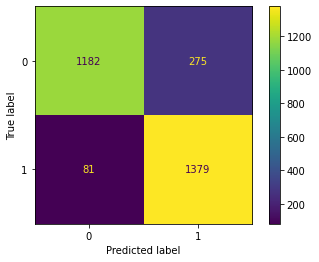

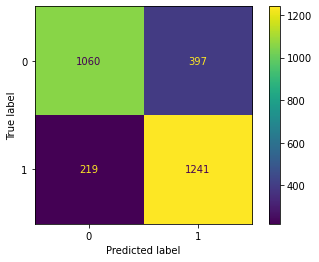

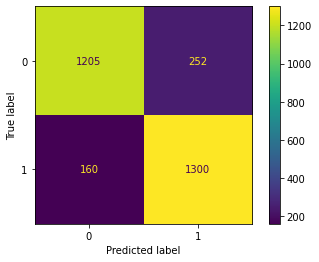

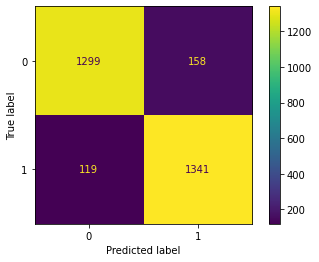

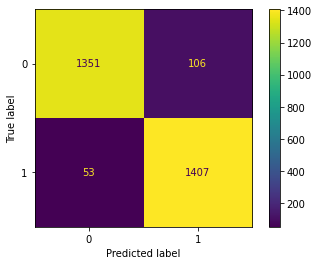

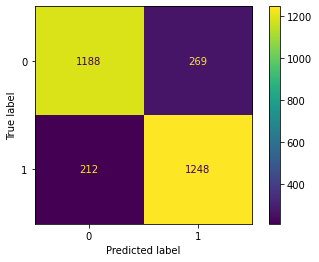

In [44]:
#in addition to confusionMatrix & classification_report, applying Hamming_Loss too.
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,hamming_loss
for i in lstmodel:
  print(i)
  i.fit(X_train_new,y_train)
  y_pred=i.predict(X_test_new)
  print('************************************')
  print(classification_report(y_test,y_pred))
  print('Hamming_Loss :',hamming_loss(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
  print('************************************')

Got highest accuracy in RandomForest Classifier such as 94%